# Bike Rental Gothenburg

* Exploration of Bike Rental in Gothenburg

In [1]:
#Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn2_circles
from sklearn.cluster import KMeans

## Explore data columns

In [2]:
#Data import
df = pd.read_excel('bike-rental-gbg-travel-2020.xlsx')
df = df.rename(columns = {"Start time": "start_time", "End time": "end_time", "Duration" : "duration",
                              "Start station number" : "start_station_num", "Rental place" : "start_station_name",
                              "End station number" : "end_station_num", "Return place" : "end_station_name",
                              "Bike number" : "bike_number"})

In [3]:
#Quick check of data
print('shape: '+  str(df.shape))
print(df.dtypes)
df.head()

shape: (190288, 8)
start_time            datetime64[ns]
end_time              datetime64[ns]
duration                       int64
start_station_num            float64
start_station_name            object
end_station_num              float64
end_station_name              object
bike_number                    int64
dtype: object


,start_time,end_time,duration,start_station_num,start_station_name,end_station_num,end_station_name,bike_number
0,2020-06-10 06:17:03,2020-06-10 06:30:06,14,41189.0,Domkyrkan,41189.0,Domkyrkan,710161
1,2020-06-10 06:30:36,2020-06-10 06:31:49,2,41189.0,Domkyrkan,41189.0,Domkyrkan,710939
2,2020-06-10 06:34:57,2020-06-10 06:36:43,2,41189.0,Domkyrkan,41189.0,Domkyrkan,710067
3,2020-06-10 06:37:54,2020-06-10 06:39:01,2,41189.0,Domkyrkan,41189.0,Domkyrkan,710817
4,2020-06-10 06:46:44,2020-06-10 07:00:44,14,41184.0,Östra Hamngatan/Kronhusgatan,41174.0,Masthuggstorget,710914


In [4]:
# Desceribe columns
# 192088 total amount of rows
# 185180 start station
# 183586 end station

df.describe()


,duration,start_station_num,end_station_num,bike_number
count,190288.000000,185180.000000,183586.000000,190288.000000
mean,38.466698,41168.081434,41166.660366,710995.062090
std,288.429364,32.306960,31.195141,573.894224
min,1.000000,40998.000000,40995.000000,710000.000000
25%,7.000000,41144.000000,41142.000000,710496.000000
50%,11.000000,41169.000000,41166.000000,710994.000000
75%,18.000000,41190.000000,41189.000000,711488.000000
max,43236.000000,41300.000000,41250.000000,711999.000000


In [5]:
#Explore bike numbers
bike_numbers = df['bike_number'].unique()
print('Lowest bike number: ' + str(bike_numbers.min()))
print('Highest bike numbers: ' + str(bike_numbers.max()))
print('Number of bikes:' + str(len(bike_numbers)))

Lowest bike number: 710000
Highest bike numbers: 711999
Number of bikes:1995


In [6]:
curr_highest = df['start_time'][0]
curr_latest_bike = 71000
for num in bike_numbers:
    candidate_time = df['start_time'][df['bike_number'] == num].head(1).iloc[0]
    if candidate_time > curr_highest:
        curr_highest = candidate_time
        curr_latest_bike = num

df[df['bike_number'] == curr_latest_bike]

,start_time,end_time,duration,start_station_num,start_station_name,end_station_num,end_station_name,bike_number
169879,2020-11-23 18:42:43,2020-11-23 18:43:46,2,41215.0,Lindholmspiren,41215.0,Lindholmspiren,710927


In [7]:
# Duration column
# Possibly to remove some data points here that can impact mean.
# What are the reasons for such a long period?
df['duration'].sort_values(axis = 0, ascending = False).head(20)

161205    43236
9348      21599
9644      21018
8051      17090
75834     16580
1495      15849
8839      15745
75753     15431
7924      14565
75768     14226
1593      14133
1076      12704
10237     12690
75792     12682
75794     12585
10294     12532
10295     12530
75798     12524
75799     12443
75800     12420
Name: duration, dtype: int64

In [8]:
# Station column
# How many stations have been started from or ended to only?
# How can this be?

print('__Minimum stations__ \n' + 'Start station : ' +  str(df['start_station_num'].min()) +
      '\nEnd station: ' + str(df['end_station_num'].min()))

print('\n__Maximum stations__ \n' + 'Start station : ' +  str(df['start_station_num'].max()) +
      '\nEnd station: ' + str(df['end_station_num'].max()))

print('Intresting stations exist --> workshop outgoing bikes (40998) - workshop needs repair(40999) etc')
df[df['start_station_num'] < 41000]


__Minimum stations__ 
Start station : 40998.0
End station: 40995.0

__Maximum stations__ 
Start station : 41300.0
End station: 41250.0
Intresting stations exist --> workshop outgoing bikes (40998) - workshop needs repair(40999) etc


,start_time,end_time,duration,start_station_num,start_station_name,end_station_num,end_station_name,bike_number
203,2020-06-10 17:14:19,2020-06-10 17:42:46,29,40998.0,workshop - outgoing bikes,41178.0,Östra Hamngatan,710584
690,2020-06-11 21:08:44,2020-06-11 21:12:31,4,40998.0,workshop - outgoing bikes,41107.0,Mölndals bro,710331
2350,2020-06-15 08:04:56,2020-06-15 08:05:48,1,40999.0,workshop - needs repair,NaN,NaN,710038
3970,2020-06-18 07:45:35,2020-06-18 07:46:08,1,40998.0,workshop - outgoing bikes,NaN,NaN,710709
4143,2020-06-18 14:20:15,2020-06-18 14:40:57,21,40998.0,workshop - outgoing bikes,41178.0,Östra Hamngatan,710454
...,...,...,...,...,...,...,...,...
184878,2020-12-16 14:57:16,2020-12-16 14:58:05,1,40999.0,workshop - needs repair,41204.0,Vasagatan/Schillerska,710603
185456,2020-12-17 12:52:28,2020-12-17 12:53:56,2,40999.0,workshop - needs repair,NaN,NaN,710339
185483,2020-12-17 14:59:09,2020-12-17 15:34:38,36,40999.0,workshop - needs repair,41131.0,Valand,711236
185499,2020-12-17 15:40:48,2020-12-23 09:55:04,8295,40998.0,workshop - outgoing bikes,40998.0,workshop - outgoing bikes,710386


In [9]:
df[df['end_station_num'] < 40998]

,start_time,end_time,duration,start_station_num,start_station_name,end_station_num,end_station_name,bike_number
75718,2020-06-18 06:45:02,2020-06-18 07:02:25,18,NaN,NaN,40995.0,workshop - Scrapped bikes,710612
75808,2020-06-30 16:38:00,2020-07-04 12:51:35,5534,41213.0,Wieselgrensplatsen,40996.0,workshop - needs heavy repair,710706
75816,2020-06-30 21:39:17,2020-07-08 12:46:15,10987,41213.0,Wieselgrensplatsen,40996.0,workshop - needs heavy repair,710614
75843,2020-07-02 14:54:57,2020-07-02 15:11:19,17,41134.0,Gustaf Adolfs torg,40996.0,workshop - needs heavy repair,710157
75854,2020-07-02 19:57:01,2020-07-02 20:36:48,40,41112.0,Åby Arenastad,40996.0,workshop - needs heavy repair,710725
75855,2020-07-02 19:57:01,2020-07-02 20:36:48,40,41112.0,Åby Arenastad,40996.0,workshop - needs heavy repair,710725
75930,2020-07-16 12:18:39,2020-07-16 13:26:32,68,41135.0,Rosenlundsplatsen,40996.0,workshop - needs heavy repair,710860
75937,2020-07-16 19:35:41,2020-07-17 09:04:23,809,41202.0,Gamlestads torg,40996.0,workshop - needs heavy repair,710173
75949,2020-07-17 20:57:01,2020-07-18 10:09:54,793,41209.0,Hjalmar Brantingsplatsen,40995.0,workshop - Scrapped bikes,710377
76022,2020-07-24 19:11:52,2020-07-28 08:18:06,5107,41186.0,Lindholmsplatsen,40996.0,workshop - needs heavy repair,710762


In [10]:
df[df['start_station_num'] > 41250]

,start_time,end_time,duration,start_station_num,start_station_name,end_station_num,end_station_name,bike_number
98,2020-06-10 14:07:59,2020-06-10 14:08:48,1,41300.0,Test Station Workshop,NaN,NaN,710003


In [11]:
df[df['end_station_name'] == 'workshop - needs heavy repair']

,start_time,end_time,duration,start_station_num,start_station_name,end_station_num,end_station_name,bike_number
75808,2020-06-30 16:38:00,2020-07-04 12:51:35,5534,41213.0,Wieselgrensplatsen,40996.0,workshop - needs heavy repair,710706
75816,2020-06-30 21:39:17,2020-07-08 12:46:15,10987,41213.0,Wieselgrensplatsen,40996.0,workshop - needs heavy repair,710614
75843,2020-07-02 14:54:57,2020-07-02 15:11:19,17,41134.0,Gustaf Adolfs torg,40996.0,workshop - needs heavy repair,710157
75854,2020-07-02 19:57:01,2020-07-02 20:36:48,40,41112.0,Åby Arenastad,40996.0,workshop - needs heavy repair,710725
75855,2020-07-02 19:57:01,2020-07-02 20:36:48,40,41112.0,Åby Arenastad,40996.0,workshop - needs heavy repair,710725
75930,2020-07-16 12:18:39,2020-07-16 13:26:32,68,41135.0,Rosenlundsplatsen,40996.0,workshop - needs heavy repair,710860
75937,2020-07-16 19:35:41,2020-07-17 09:04:23,809,41202.0,Gamlestads torg,40996.0,workshop - needs heavy repair,710173
76022,2020-07-24 19:11:52,2020-07-28 08:18:06,5107,41186.0,Lindholmsplatsen,40996.0,workshop - needs heavy repair,710762
76032,2020-07-25 17:54:23,2020-07-25 18:38:48,45,NaN,NaN,40996.0,workshop - needs heavy repair,711487
76044,2020-07-27 14:32:08,2020-07-27 17:13:35,162,41133.0,Grönsakstorget,40996.0,workshop - needs heavy repair,711082


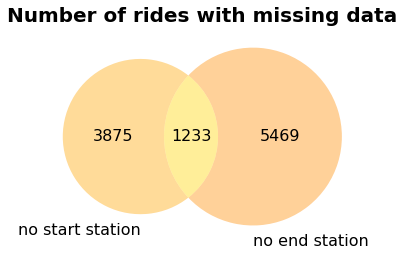

In [12]:
# Null Analysis
nan_start = df[(df['start_station_num'].isnull())].index
nan_end = df[(df['end_station_num'].isnull())].index

ven = venn2([set(nan_start), set(nan_end)],set_labels = ('no start station', 'no end station'),
      set_colors= ('orange', 'darkorange', 'orange'))
for text in ven.subset_labels:
    text.set_fontsize(16)
for text in ven.set_labels:
    text.set_fontsize(16)
plt.title('Number of rides with missing data', fontsize = 20, fontweight = 'bold')
plt.show()

In [13]:
# Important to understand domain specific details
# Should we simply delete Nan? Fill it with values. NO!
# Interesting analysis of these bikes.
nan_start_either = df[(df['start_station_num'].isnull()) | (df['end_station_num'].isnull())]
nan_both = df[(df['start_station_num'].isnull()) & (df['end_station_num'].isnull())]
nan_start_not_end = df[(df['start_station_num'].isnull()) & (~df['end_station_num'].isnull())]
nan_end_not_start = df[(~df['start_station_num'].isnull()) & (df['end_station_num'].isnull())]

## Travel statistics (duration, hour, week, day, ...)

In [14]:
days_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday']
df.groupby(df['start_time'].dt.day_name()).count().reindex(days_order)

months_order = ['June', 'July', 'August', 'September', 'October', 'November', 'December']
df.groupby(df['start_time'].dt.month_name()).count().reindex(months_order)

,start_time,end_time,duration,start_station_num,start_station_name,end_station_num,end_station_name,bike_number
start_time,,,,,,,,
June,11176,11176,11176,10360,10360,10035,10035,11176
July,21929,21929,21929,20773,20773,20291,20291,21929
August,39140,39140,39140,37871,37871,37563,37563,39140
September,44033,44033,44033,43123,43123,42862,42862,44033
October,35860,35860,35860,35296,35296,35155,35155,35860
November,22370,22370,22370,22117,22117,22075,22075,22370
December,15780,15780,15780,15640,15640,15605,15605,15780


In [15]:
df_plot = df.copy()
df_plot['day'] = df['start_time'].dt.day_name().astype(pd.api.types.CategoricalDtype(categories = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday']))
df_plot['month'] = df['start_time'].dt.month_name().astype(pd.api.types.CategoricalDtype(categories = ['June', 'July', 'August', 'September', 'October', 'November', 'December']))
df_plot['start_hour'] = df['start_time'].dt.hour
df_plot['end_hour'] = df['end_time'].dt.hour
# Simply get the count
month_day = pd.crosstab(df_plot['month'], df_plot['day'])
day_hour = pd.crosstab(df_plot['start_hour'], df_plot['day'])
month_hour = pd.crosstab(df_plot['start_hour'], df_plot['month'])
#tab = pd.crosstab(df_plot['month'], df_plot['day']).reindex(days_order, axis = 1, months_order, )
# Get the duration. Be careful that some might have very high value!
heatmap_data = pd.pivot_table(df_plot[['month', 'day', 'duration']], values = 'duration', index = ['month'], columns = 'day')


<AxesSubplot:xlabel='day', ylabel='month'>

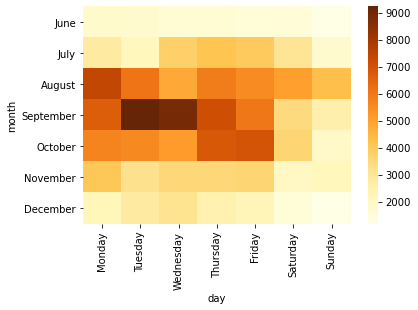

In [16]:
sns.heatmap(month_day, cmap = 'YlOrBr')

<AxesSubplot:xlabel='day', ylabel='start_hour'>

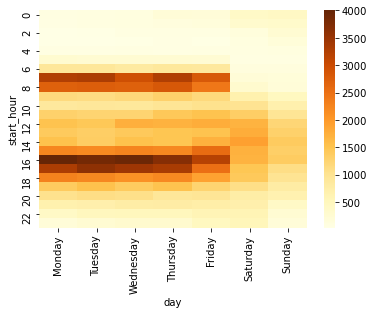

In [17]:
sns.heatmap(day_hour, cmap = 'YlOrBr')

<AxesSubplot:xlabel='month', ylabel='start_hour'>

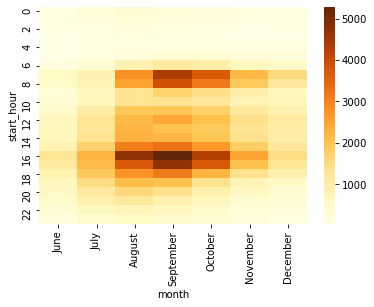

In [18]:
sns.heatmap(month_hour, cmap = 'YlOrBr')


<AxesSubplot:xlabel='day', ylabel='duration'>

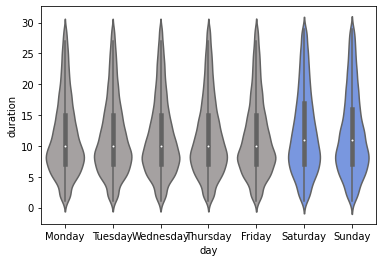

In [19]:
# Duration of travels
colors_list = ['#A5A1A1', '#A5A1A1',  '#A5A1A1',  '#A5A1A1',  '#A5A1A1', '#6890F0', '#6890F0']
sns.violinplot(x = 'day', y = 'duration', data = df_plot[df_plot['duration'] < 30], palette=colors_list)

<AxesSubplot:xlabel='month', ylabel='duration'>

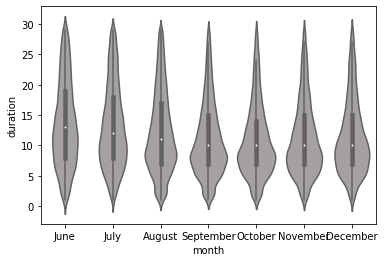

In [20]:
colors_list = ['#A5A1A1', '#A5A1A1',  '#A5A1A1',  '#A5A1A1',  '#A5A1A1', '#A5A1A1', '#A5A1A1']
sns.violinplot(x = 'month', y = 'duration', data = df_plot[df_plot['duration'] < 30], palette=colors_list)

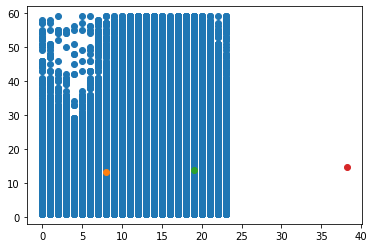

In [21]:
df_plot_dur_reduce = df_plot[df_plot['duration'] < 60]

kmeans = KMeans(n_clusters= 3).fit(df_plot_dur_reduce[['duration', 'start_hour']])
kmeans.cluster_centers_

plt.scatter(x = df_plot_dur_reduce['start_hour'], y = df_plot_dur_reduce['duration'])
plt.scatter(x = kmeans.cluster_centers_[0][0], y = kmeans.cluster_centers_[0][1])
plt.scatter(x = kmeans.cluster_centers_[1][0], y = kmeans.cluster_centers_[1][1])
plt.scatter(x = kmeans.cluster_centers_[2][0], y = kmeans.cluster_centers_[2][1])
#plt.scatter(x = kmeans.cluster_centers_[3][0], y = kmeans.cluster_centers_[3][1])

<ipython-input-22-f40a219968fe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot_july_december['month'] = df_plot_july_december['month'].cat.remove_categories(['June', 'August', 'September', 'October', 'November'])


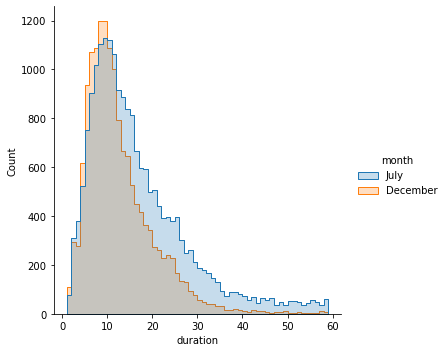

In [22]:
df_plot_july_december = df_plot_dur_reduce[df_plot_dur_reduce['month'].isin(['July', 'December'])]
df_plot_july_december['month'] = df_plot_july_december['month'].cat.remove_categories(['June', 'August', 'September', 'October', 'November'])
sns.displot(df_plot_july_december, x = 'duration', binwidth = 1, hue = 'month', element = 'step')

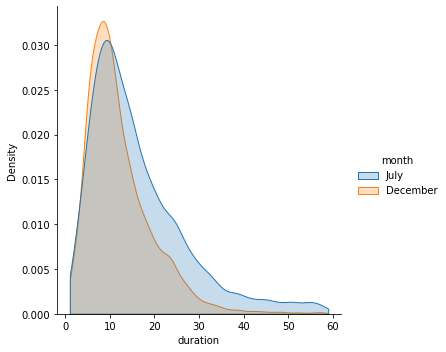

In [23]:
sns.displot(df_plot_july_december, x = 'duration', hue = 'month', kind = 'kde', fill = 'true', cut = 0)

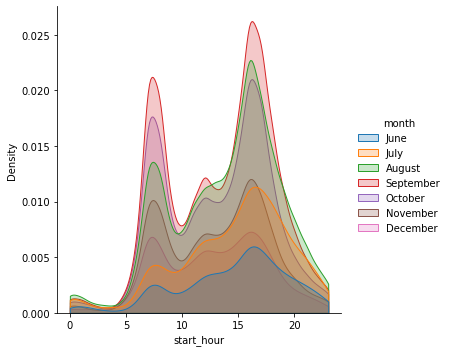

In [24]:
sns.displot(df_plot, x = 'start_hour', hue = 'month', kind = 'kde', fill = 'true', cut = 0)

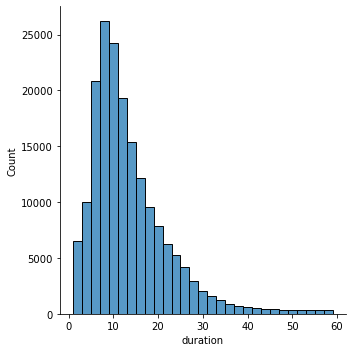

In [25]:
sns.displot(df_plot_dur_reduce, x = 'duration', binwidth = 2)


In [26]:
df_plot_july_december.groupby('month').sum()

,duration,start_station_num,end_station_num,bike_number,start_hour,end_hour
month,,,,,,
July,323370,780723675.0,768646870.0,14186458510,290110,293466
December,187553,627294733.0,625863133.0,10926263544,196970,199578


<AxesSubplot:xlabel='start_hour', ylabel='duration'>

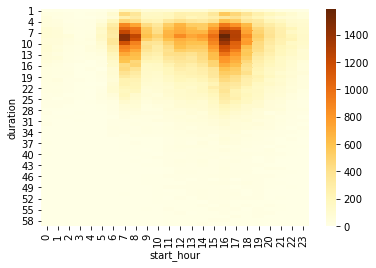

In [27]:
sns.heatmap(pd.crosstab(df_plot_dur_reduce['duration'], df_plot_dur_reduce['start_hour']), cmap = 'YlOrBr')

## Station Analysis

### Start filter data

In [28]:
# Station
start_station_count = df_plot.groupby('start_station_name')['start_station_name'].count()

In [29]:
end_station_count = df_plot.groupby('end_station_name')['end_station_name'].count()
end_station_count

end_station_name
Almedal                         2421
Aminogatan                       162
Anders Carlssons gata            922
AstraZeneca                      736
Bastionsplatsen                    1
                                ... 
Åbymässan                        288
Åvägen                          1462
Åvägen norra                    3347
Östra Hamngatan                 4590
Östra Hamngatan/Kronhusgatan    3191
Name: end_station_name, Length: 123, dtype: int64

In [30]:
start_end_count = pd.concat([start_station_count, end_station_count], axis = 1)
start_end_count = start_end_count.rename(columns = {'start_station_name': 'total_starts', 'end_station_name' : 'total_ends'})

In [31]:
start_end_count['total_diff'] = start_end_count['total_starts'] - start_end_count['total_ends']
start_end_count['diff_percentage'] = start_end_count['total_diff']/(start_end_count['total_starts'] + start_end_count['total_ends'])

In [32]:
start_end_count.sort_values(by='diff_percentage').head(10)

,total_starts,total_ends,total_diff,diff_percentage
Grönsakstorget,2209.0,3306.0,-1097.0,-0.198912
Östra Hamngatan,3243.0,4590.0,-1347.0,-0.171965
Olof Palmes plats,3513.0,4885.0,-1372.0,-0.163372
Anders Carlssons gata,664.0,922.0,-258.0,-0.162673
Olskrokstorget,1709.0,2342.0,-633.0,-0.156258
Domkyrkan,2892.0,3923.0,-1031.0,-0.151284
Almedal,1820.0,2421.0,-601.0,-0.141712
Liseberg station,2251.0,2923.0,-672.0,-0.129880
Scandinavium,888.0,1151.0,-263.0,-0.128985
Centralen långtidsparkering,119.0,154.0,-35.0,-0.128205


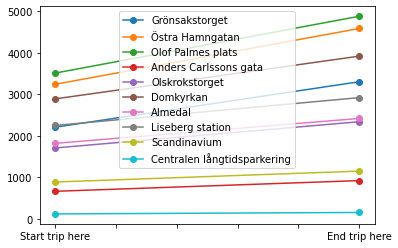

In [33]:
d = start_end_count.sort_values(by='diff_percentage').head(10)
for station in d.index:
    plt.plot([d.loc[station][0], d.loc[station][1]], marker = 'o', label = station)
plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0], ['Start trip here', '', '', '', '', 'End trip here'])
plt.legend()

### Filter data functions

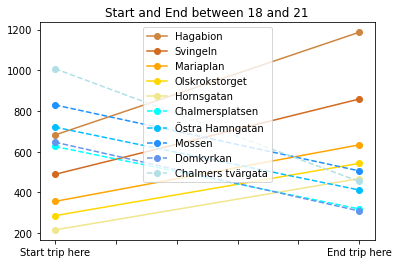

In [34]:
def filter_data(h_start = 0, h_end = 23, sort_order = 'diff_percentage', min_trips = 0, num_results = 3,input_df = df_plot):
    data = input_df[(input_df['start_hour'] >= h_start) & (input_df['end_hour'] <= h_end)]
    start_station = data.groupby('start_station_name')['start_station_name'].count()
    start_station = start_station.where(start_station > min_trips).dropna()
    end_station = data.groupby('end_station_name')['end_station_name'].count()
    end_station = end_station.where(end_station > min_trips).dropna()
    start_end = pd.concat([start_station, end_station], axis = 1)
    start_end = start_end.rename(columns = {'start_station_name': 'total_starts', 'end_station_name' : 'total_ends'})
    start_end['total_diff'] = start_end['total_starts'] - start_end['total_ends']
    start_end['diff_percentage'] = start_end['total_diff']/(start_end['total_starts'] + start_end['total_ends'])

    # TODO Should NA be dropped? Or replace it with zero? Need domain expertise resarch
    popular_start =  start_end.sort_values(by=sort_order).dropna().head(num_results)
    popular_end = start_end.sort_values(by=sort_order).dropna().tail(num_results)
    popular_stations = list(popular_start.index) + list(popular_end.index)

    # TODO Quick and Dirty solution for color increase, but this could be done much better!
    color_increase = ['aqua', 'deepskyblue', 'dodgerblue', 'cornflowerblue', 'powderblue']
    color_decrease = ['peru', 'chocolate', 'orange', 'gold', 'khaki']

    color_increase_index = 0
    color_decrease_index = 0
    for station in popular_stations:
        if start_end.loc[station][0] > start_end.loc[station][1]:
            plt.plot([(start_end.loc[station][0]), (start_end.loc[station][1])], marker = 'o', label = station, linestyle = '--', color = color_increase[color_increase_index])
            color_increase_index += 1
        else:
            plt.plot([(start_end.loc[station][0]), (start_end.loc[station][1])], marker = 'o', label = station, color = color_decrease[color_decrease_index])
            color_decrease_index += 1
        plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0], ['Start trip here', '', '', '', '', 'End trip here'])
        plt.legend()
        plt.title(f'Start and End between {h_start} and {h_end}')



filter_data(h_start = 18, h_end = 21, min_trips = 10, num_results= 5, sort_order= 'total_diff')



In [35]:
def filter_data_2(h_start = 0, h_end = 23, sort_order = 'diff_percentage', min_trips = 0, num_results = 3,input_df = df_plot):
    data = input_df[(input_df['start_hour'] >= h_start) & (input_df['end_hour'] <= h_end)]
    start_station = data.groupby('start_station_name')['start_station_name'].count()
    start_station = start_station.where(start_station > min_trips).dropna()
    end_station = data.groupby('end_station_name')['end_station_name'].count()
    end_station = end_station.where(end_station > min_trips).dropna()
    start_end = pd.concat([start_station, end_station], axis = 1)
    start_end = start_end.rename(columns = {'start_station_name': 'total_starts', 'end_station_name' : 'total_ends'})
    start_end['total_diff'] = start_end['total_starts'] - start_end['total_ends']
    start_end['diff_percentage'] = start_end['total_diff']/(start_end['total_starts'] + start_end['total_ends'])

    # TODO Should NA be dropped? Or replace it with zero? Need domain expertise resarch
    popular_start =  start_end.sort_values(by=sort_order).dropna().head(num_results)
    popular_end = start_end.sort_values(by=sort_order).dropna().tail(num_results)
    popular_stations = list(popular_start.index) + list(popular_end.index)

    return start_end, popular_stations

def viz_start_end(data, stations, h_start = 'unspecified', h_end = 'unspecified'):
    color_increase = ['aqua', 'deepskyblue', 'dodgerblue', 'cornflowerblue', 'powderblue']
    color_decrease = ['peru', 'chocolate', 'orange', 'gold', 'khaki']

    color_increase_index = 0
    color_decrease_index = 0
    for station in stations:
        if data.loc[station][0] > data.loc[station][1]:
            plt.plot([(data.loc[station][0]), (data.loc[station][1])], marker = 'o', label = station, linestyle = '--', color = color_increase[color_increase_index])
            color_increase_index += 1
        else:
            plt.plot([(data.loc[station][0]), (data.loc[station][1])], marker = 'o', label = station, color = color_decrease[color_decrease_index])
            color_decrease_index += 1
        plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0], ['Start trip here', '', '', '', '', 'End trip here'])
        plt.legend()
        plt.title(f'Start and End between {h_start} and {h_end}')

data, stations = filter_data_2(h_start = 6, h_end = 9, min_trips = 100, num_results= 10, sort_order= 'total_diff')
#viz_start_end(data, stations)

In [36]:
hour_start = df_plot.groupby(['start_station_name', 'start_hour'])['start_station_num'].count().reset_index()

In [37]:
hour_end = df_plot.groupby(['end_station_name', 'end_hour'])['start_station_num'].count().reset_index()
hour_end.index
hour_start.index

RangeIndex(start=0, stop=2587, step=1)

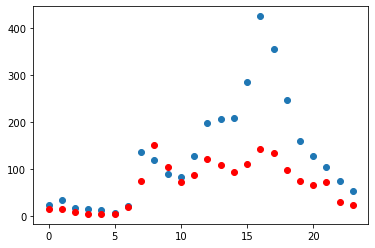

In [38]:
merge_hour = pd.merge(hour_start, hour_end, left_on =['start_station_name', 'start_hour'], right_on = ['end_station_name', 'end_hour'], suffixes= ['-start', '-end'], how = 'inner')
top = merge_hour[merge_hour['start_station_name'] == 'Chalmersplatsen']
plt.scatter(top['start_hour'], top['start_station_num-start'])
plt.scatter(top['start_hour'], top['start_station_num-end'], color = 'red')

In [40]:
print(type(top))
#sns.displot(df_plot_july_december, x = 'duration', hue = 'month', kind = 'kde', fill = 'true', cut = 0)
#sns.displot(data = top, x = 'start_hour', y =['start_station_num-start', 'start_station_num-end'], hue = 'end_station_name', kind = 'kde')


<class 'pandas.core.frame.DataFrame'>


### Number of start and end trips for each hour

In [41]:
df_plot2 = df_plot.copy()

<AxesSubplot:xlabel='hour', ylabel='start_station_num-start'>

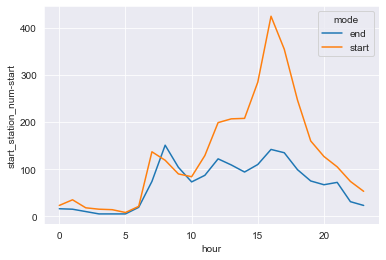

In [42]:
'''Look at numbers of start and end trips for each hour
This is some extra steps'''
start = top.iloc[:,:3]
start['mode'] = 'start'
start = start.rename(columns={'start_station_name' : 'station', 'start_hour' : 'hour'})
end = top.iloc[:,3:]
end['mode'] = 'end'
end = end.rename(columns={'start_station_num-end': 'start_station_num-start', 'end_station_name' : 'station', 'end_hour': 'hour'})

temp = end.append(start)

#Changes the stile
sns.set_style('darkgrid')
sns.lineplot(data = temp, x = 'hour', y = 'start_station_num-start', hue = 'mode')
#sns.displot(df_plot, x = 'start_hour', hue = 'month', kind = 'kde', fill = 'true', cut = 0)

In [43]:
def increasing(series, t):
    return t

def bucket(series):
    count = 0
    for i in series:
        if i <= 5:
            count = count + 1
    return count

'''Data for duration starting from this point'''
temp2 = df_plot.groupby(['start_station_name', 'start_hour'])['duration'].agg([('0-5', lambda x:sum(x<=5)),
                                                                        ('6-10', lambda x:sum((x>=6) & (x<=10))),
                                                                        ('11-15', lambda x:sum((x>=11) & (x<=15))),
                                                                        ('16-20', lambda x:sum((x>=16) & (x<=20))),
                                                                        ('21+', lambda x:sum(x>=21))]).reset_index()

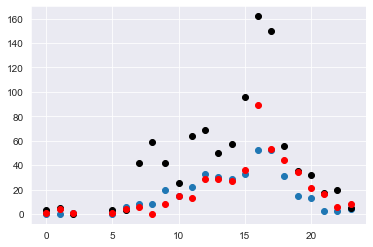

In [44]:
plt.scatter(temp2[temp2['start_station_name'] == 'Östra Hamngatan/Kronhusgatan']['start_hour'],temp2[temp2['start_station_name'] == 'Östra Hamngatan/Kronhusgatan']['0-5'])
plt.scatter(temp2[temp2['start_station_name'] == 'Östra Hamngatan/Kronhusgatan']['start_hour'],temp2[temp2['start_station_name'] == 'Östra Hamngatan/Kronhusgatan']['6-10'], color = 'black')
plt.scatter(temp2[temp2['start_station_name'] == 'Östra Hamngatan/Kronhusgatan']['start_hour'],temp2[temp2['start_station_name'] == 'Östra Hamngatan/Kronhusgatan']['21+'], color = 'red')


In [45]:
hour_start = df_plot.groupby(['start_station_name', 'start_hour'])['start_station_num'].count().reset_index()

In [46]:
hour_end = df_plot.groupby(['end_station_name', 'end_hour'])['start_station_num'].count().reset_index()
hour_end.index
hour_start.index


RangeIndex(start=0, stop=2587, step=1)

In [47]:
merge_hour[merge_hour['start_station_name'] == 'Almedal']

,start_station_name,start_hour,start_station_num-start,end_station_name,end_hour,start_station_num-end
0,Almedal,0,7,Almedal,0,24
1,Almedal,1,6,Almedal,1,21
2,Almedal,2,10,Almedal,2,7
3,Almedal,3,3,Almedal,3,5
4,Almedal,4,3,Almedal,4,8
5,Almedal,5,3,Almedal,5,15
6,Almedal,6,55,Almedal,6,77
7,Almedal,7,187,Almedal,7,251
8,Almedal,8,159,Almedal,8,260
9,Almedal,9,67,Almedal,9,101


na
na
na
na
na
na
na
na
na
na
na
na
na
na
na
na
na
na
na
na
na
na
na
na
na
na


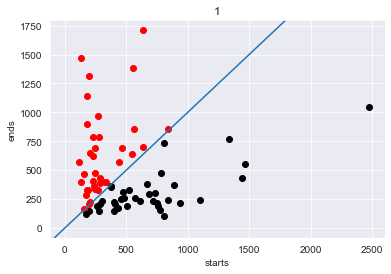

In [48]:
# more_starts = data.apply(lambda x: x['total_starts'] - x['total_ends'], axis = 1)
na_count = 0
for index, rows in data.iterrows():
    if rows.isna().any():
        na_count =+ 1
        print('na')
    else:
        if rows['total_diff'] > 0:
            clr = 'black'
        else:
            clr = 'red'
        plt.scatter(rows['total_starts'], rows['total_ends'], color = clr)
        plt.title(na_count)
#plt.scatter(data['total_starts'], data['total_ends'])
plt.xlabel('starts')
plt.ylabel('ends')
plt.axline([0,0], [100,100])

### End-to-End flow

In [49]:
## Filter the data

# TODO add here to filter out stations
filtered_data = df_plot[df_plot['start_station_name'].isin(stations)]

## Grouping the data

# TODO - Make this nicer so not having strings, but its hard when there can be any amount
# of possible hours. Look at size of cutoff_points, build another function thar groups by this condition
def grouping_starthour_adv(df, cuttof_points, type = 'proportion', keep_total_count = False):
    cutof_dict = {}
    for i, cutof in enumerate(cuttof_points):
        if cutof == min(cuttof_points):
            id = str(0)+'-'+str(cutof)
            cutof_dict[i] = tuple([id ,0, cutof])
        else:
            id = str(cutof_dict[i-1][-1]+1) + '-' + str(cutof)
            cutof_dict[i] = tuple([id ,cutof_dict[i-1][-1]+1,cutof])
    end_key = len(cutof_dict)
    id = str(str((max(cuttof_points)+1)) + '-' + '23')
    cutof_dict[end_key] = tuple([id,max(cuttof_points)+1, 23])

    string = '['
    for key, value in cutof_dict.items():
        string = string + '(' + '\'' + str(value[0]) + '\'' + ',' + 'lambda x: sum((x >=' + str(value[1]) + ')' + ' & ' + '(x <= ' + str(value[2])  + '))),' +'\n'
    string =  string[:-2] # remove the last comma
    string = string + ',' + '\'count\'' + ']'

    temp = df.groupby(['start_station_name'])['start_hour'].agg(
        eval(string)
     )

    if type == 'proportion':
        total_count = temp['count']
        res = temp.iloc[:,:-1].div(total_count, axis = 0) #divide all col in row with total row count
        if keep_total_count:
            res['total_count'] = total_count
    return res.reset_index()

cutoff_points = [6,12,16,19]
grouped_data = grouping_starthour_adv(filtered_data,cutoff_points)
grouped_data

,start_station_name,0-6,7-12,13-16,17-19,20-23
0,Chapmans torg,0.058985,0.493827,0.212163,0.165981,0.069044
1,Domkyrkan,0.024550,0.181881,0.383817,0.330913,0.078838
2,Drottningtorget,0.119701,0.424096,0.202774,0.174408,0.079021
3,Första långgatan/Värmlandsgatan,0.051014,0.229256,0.389060,0.237861,0.092809
4,Gibraltargatan/Eklandagatan,0.099134,0.473593,0.204762,0.161472,0.061039
5,Grönsakstorget,0.016297,0.221820,0.414215,0.265731,0.081938
6,Gustaf Adolfs torg,0.035574,0.203799,0.377148,0.270727,0.112752
7,Gårdatorget,0.025739,0.159676,0.517636,0.253575,0.043375
8,Hagabion,0.057512,0.469015,0.223139,0.158939,0.091395
9,Kastellgatan,0.074738,0.491696,0.229021,0.153409,0.051136


In [50]:
## Clustering the data
# Careful if clustering take into account all features, inclding like 20-23. Should this also be dropped?
k = 3
kmeans_input_data = grouped_data.drop(columns = ['start_station_name','0-6', '20-23'])
kmeans_model = KMeans(n_clusters = k).fit(kmeans_input_data)#Drop station as it's not a feature
def find_station_label(data, model, k):
    labeldict = {}
    for i in range(k):
        labeldict[i] = []
    for index, label in enumerate(kmeans_model.labels_):
        station = grouped_data.iloc[index,0]
        labeldict[label].append(station)
    return labeldict

t = find_station_label(grouped_data,kmeans_model,k)

[0, 6, 12, 16, 19, 23]


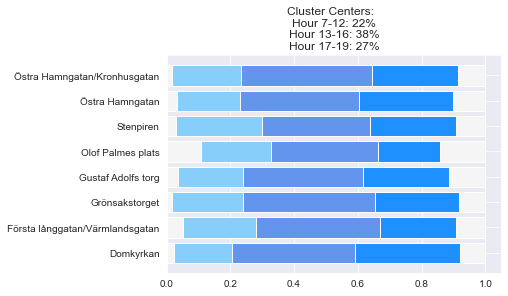

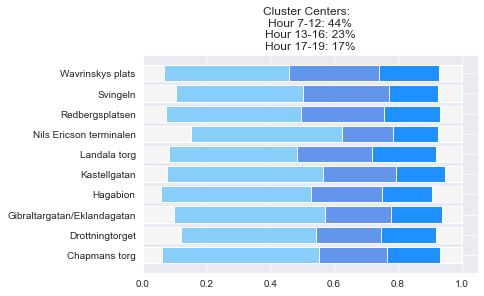

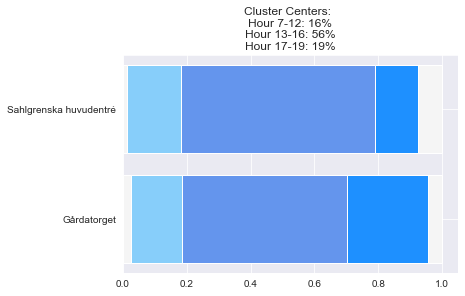

In [51]:
## Visualizing the data

def stacked_bar_clustering_viz(labeldict, data,model_data, points_of_cutoff, cluster_centers, max_results = 1000):
    def find_stacked_bottom(n, row):
        bottom = 0
        for i in range(0,n):
            bottom = bottom + row.iloc[:, (i+1)]
        return bottom

    all_cutoff_pts = points_of_cutoff.copy()
    all_cutoff_pts = [0] + all_cutoff_pts + [23]
    colors = ['whitesmoke', 'lightskyblue', 'cornflowerblue', 'dodgerblue', 'whitesmoke']
    print(all_cutoff_pts)
    fig, ax = plt.subplots()
    for key, value in enumerate(labeldict.items()):
        for i, station in enumerate(value[1]):
            row = data[data['start_station_name'] == station]
            for n in range(0,len(all_cutoff_pts)-1):
                bt = find_stacked_bottom(n,row)
                plt.barh(station, row.iloc[:,(n+1)], left = bt, color = colors[n], label = station)
        center = [ "{:.0%}".format(x) for x in cluster_centers[key]]
        combo= ['Hour ' + model_data.columns[x] + ': ' +  center[x] for x in range(len(cluster_centers[0]))]
        pretty_print = '\n'.join([str(elem) for elem in combo])
        #print(pretty_print)
        plt.title('Cluster Centers:  \n' + str(pretty_print))
        plt.show()


#{:0.2f}



stacked_bar_clustering_viz(t, grouped_data, kmeans_input_data, cutoff_points, kmeans_model.cluster_centers_)


temp = grouped_data